In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data
bs = pd.read_csv('day.csv')

In [3]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
## 1. Data Preperation

In [6]:
#reading the season column
bs['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [7]:
#mapping 1,2,3,4 to Spring, Summer, Fall, Winter respectively
def season_map(x):
    return x.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Applying the function to the season column
bs[['season']] = bs[['season']].apply(season_map)

#confirming the change
bs['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [8]:
#mapping months
def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the month column
bs[['mnth']] = bs[['mnth']].apply(month_map)

#confirming the change
bs['mnth'].value_counts()

Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [9]:
#mapping days
def day_map(x):
    return x.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Thurs', 4: 'Fri', 5: 'Sat' })

# Applying the function to the weekday column
bs[['weekday']] = bs[['weekday']].apply(day_map)

#confirming the change
bs['weekday'].value_counts()

Mon      105
Tue      105
Thurs    104
Fri      104
Sat      104
Sun      104
Name: weekday, dtype: int64

In [10]:
#mapping weather_sit
def weather_map(x):
    return x.map({1:"Clear", 2:"Cloudy", 3:"Unfavourable", 4:"Very Unfavourable"})

# Applying the function to the weekday column
bs[['weathersit']] = bs[['weathersit']].apply(weather_map)

#confirming the change
bs['weathersit'].value_counts()

Clear           463
Cloudy          246
Unfavourable     21
Name: weathersit, dtype: int64

In [11]:
# Converting date to datetime format
bs['dteday']=bs['dteday'].astype('datetime64')

In [12]:
#dropping unnecesary columns from dataframe
bs.drop(['instant','dteday', 'registered', 'casual'],axis=1, inplace =True)

In [13]:
# All categorical columns in the dataset
bs_categorical=bs.select_dtypes(exclude=['float64','datetime64','int64'])
bs_categorical.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Mon,Cloudy
1,Spring,Jan,Tue,Cloudy
2,Spring,Jan,Thurs,Clear
3,Spring,Jan,Fri,Clear
4,Spring,Jan,Sat,Clear


In [14]:
# All numeric columns in the dataset
bs_numeric=bs.select_dtypes(exclude=['object','datetime64'])
bs_numeric.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
## 2. Data Visualisation

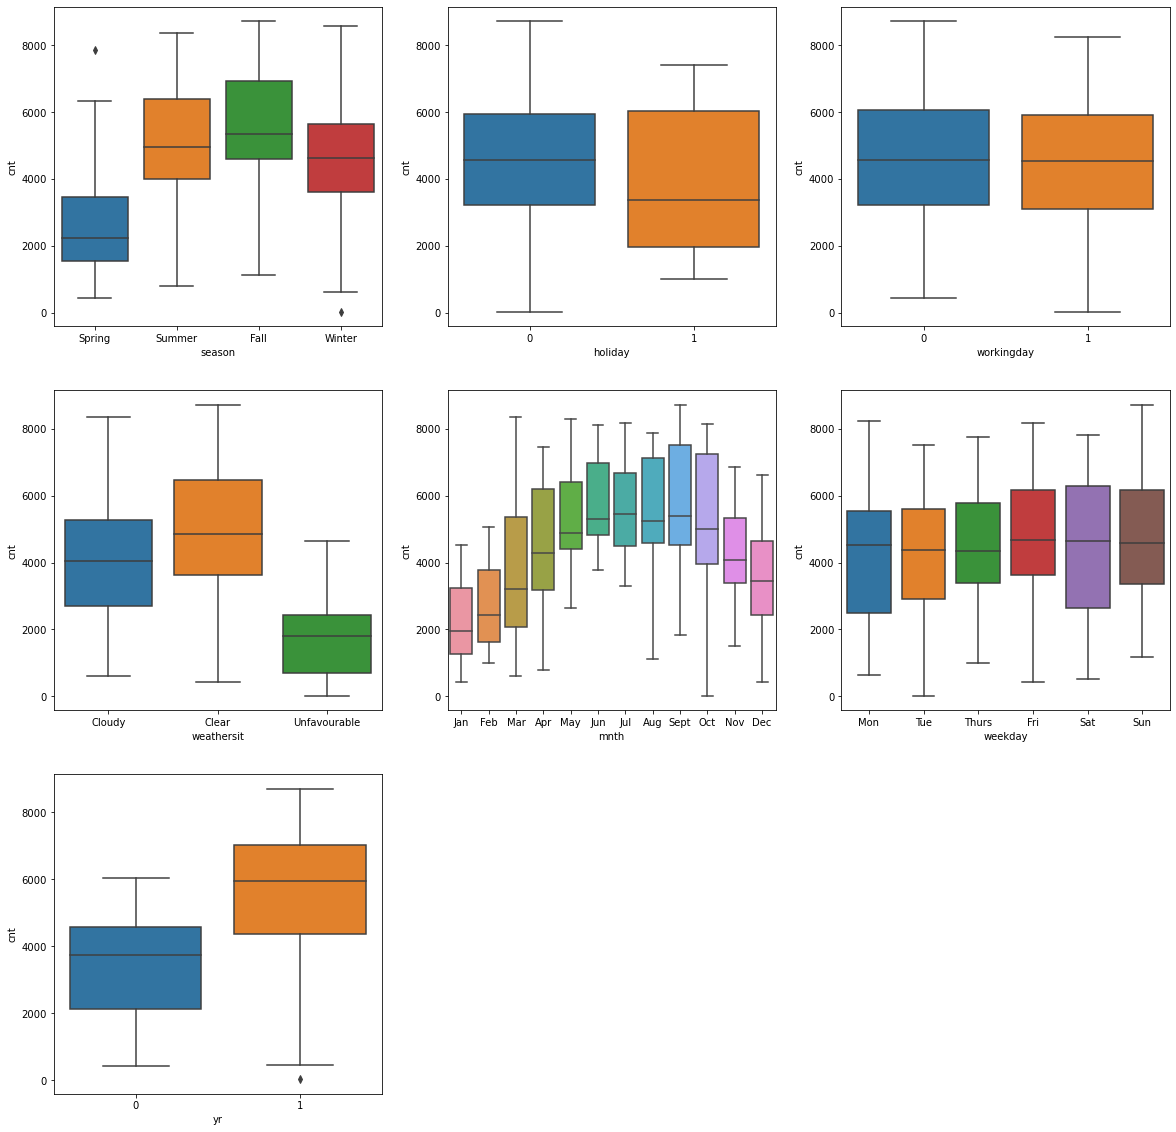

In [16]:
#visualising categorical columns
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bs)
plt.show()

In [17]:
bs_numeric.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


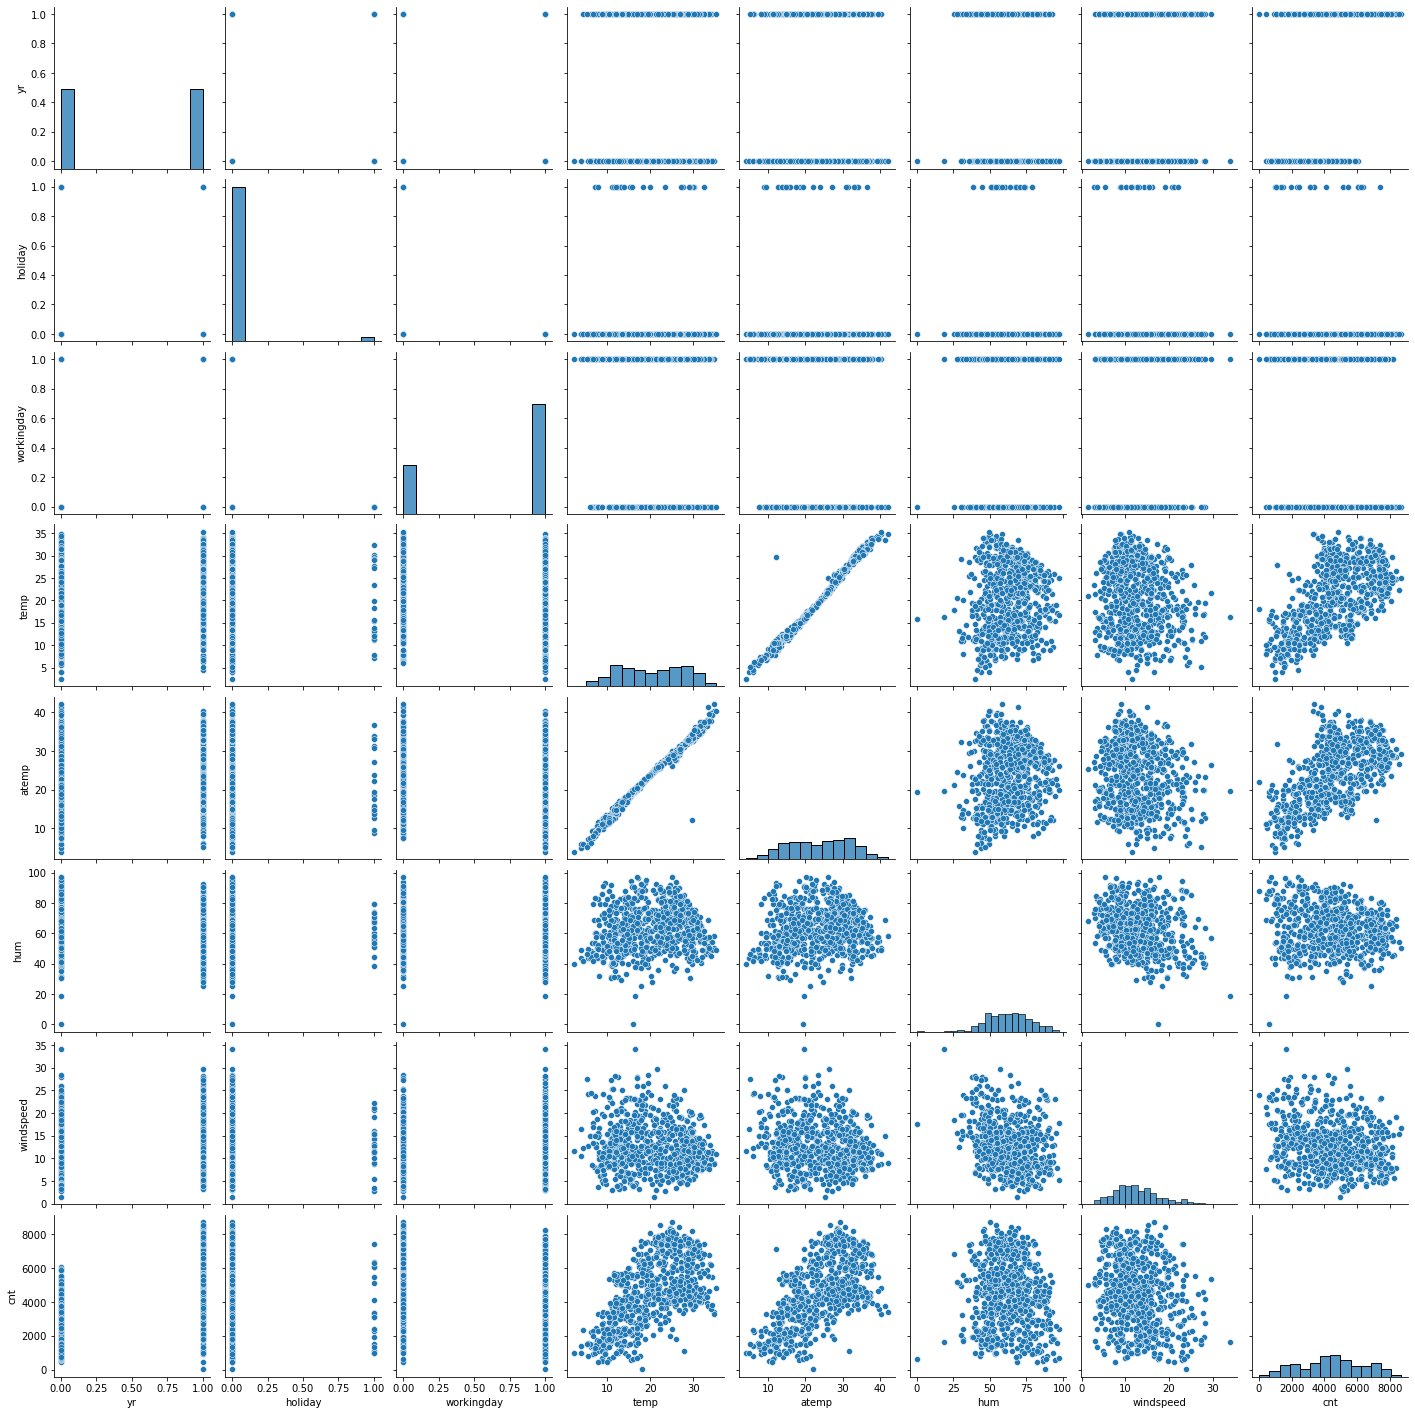

In [18]:
#visualising numerical columns
sns.pairplot(bs_numeric)
plt.show()

In [19]:
corr = bs_numeric.corr()
corr

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

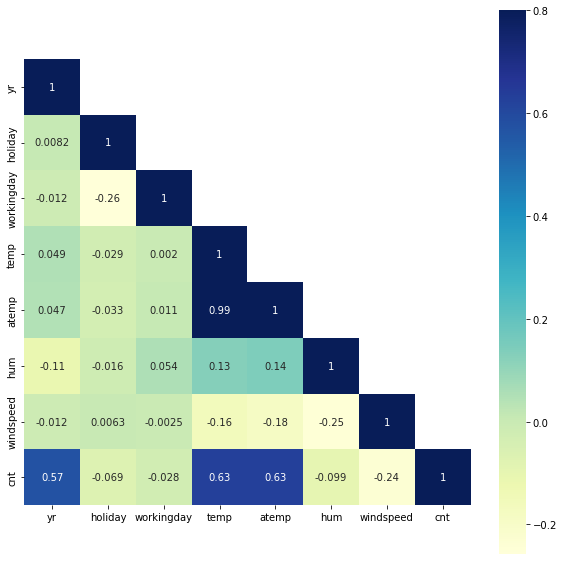

In [20]:
# creating a heatmap
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True,cmap="YlGnBu")

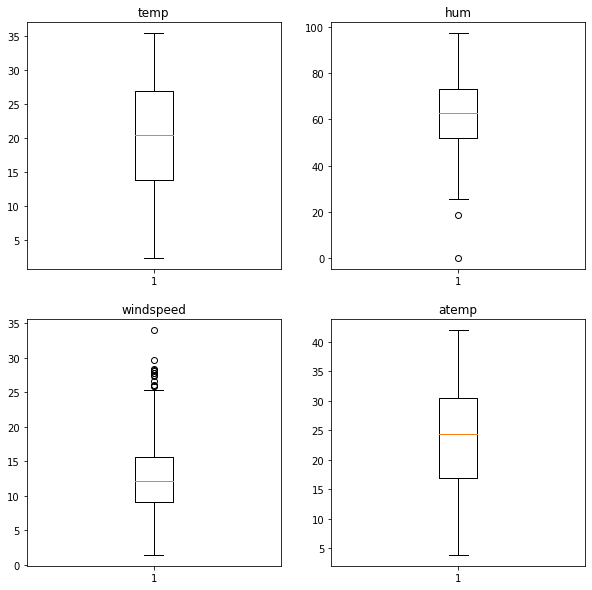

In [21]:
#detecting outliers
plt.figure(figsize=(10, 10))  
plt.subplot(2,2,1)
plt.boxplot(bs['temp'])
plt.subplot(2,2,1).set_title("temp")
plt.subplot(2,2,2)
plt.boxplot(bs['hum'])
plt.subplot(2,2,2).set_title("hum")
plt.subplot(2,2,3)
plt.boxplot(bs['windspeed'])
plt.subplot(2,2,3).set_title("windspeed")
plt.subplot(2,2,4)
plt.boxplot(bs['atemp'])
plt.subplot(2,2,4).set_title("atemp")
plt.show()

In [22]:
## 3. Data Preperation

In [23]:
bs_categorical.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Mon,Cloudy
1,Spring,Jan,Tue,Cloudy
2,Spring,Jan,Thurs,Clear
3,Spring,Jan,Fri,Clear
4,Spring,Jan,Sat,Clear


In [24]:
#creating dummy variables
bs_dummies = pd.get_dummies(bs_categorical, drop_first=True)
bs_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weathersit_Cloudy,weathersit_Unfavourable
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
# Drop categorical variable columns
bs = bs.drop(list(bs_categorical.columns), axis=1)

# Concatenate dummy variables with the original dataframe
bs = pd.concat([bs, bs_dummies], axis=1)

# rechecking the dummies
bs.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weathersit_Cloudy,weathersit_Unfavourable
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
## 4. Model building and evaluation

In [27]:
#train-test split of dataset
from sklearn.model_selection import train_test_split

#splitting data set into 80-20 ratio
np.random.seed(0)
df_train, df_test = train_test_split(bs, train_size = 0.8, test_size = 0.2, random_state = 100)

In [28]:
#Scaling features
from sklearn.preprocessing import MinMaxScaler 

In [29]:
scaler = MinMaxScaler()

In [30]:
bs_numeric.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [31]:
# Apply scaler to all the columns except the categorical columns
var = ['temp', 'hum', 'windspeed','atemp','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [32]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weathersit_Cloudy,weathersit_Unfavourable
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,...,0.080479,0.092466,0.080479,0.155822,0.152397,0.130137,0.136986,0.159247,0.342466,0.027397
std,0.500241,0.163378,0.446377,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,...,0.272267,0.289931,0.272267,0.362997,0.359714,0.336743,0.344128,0.366220,0.474941,0.163378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


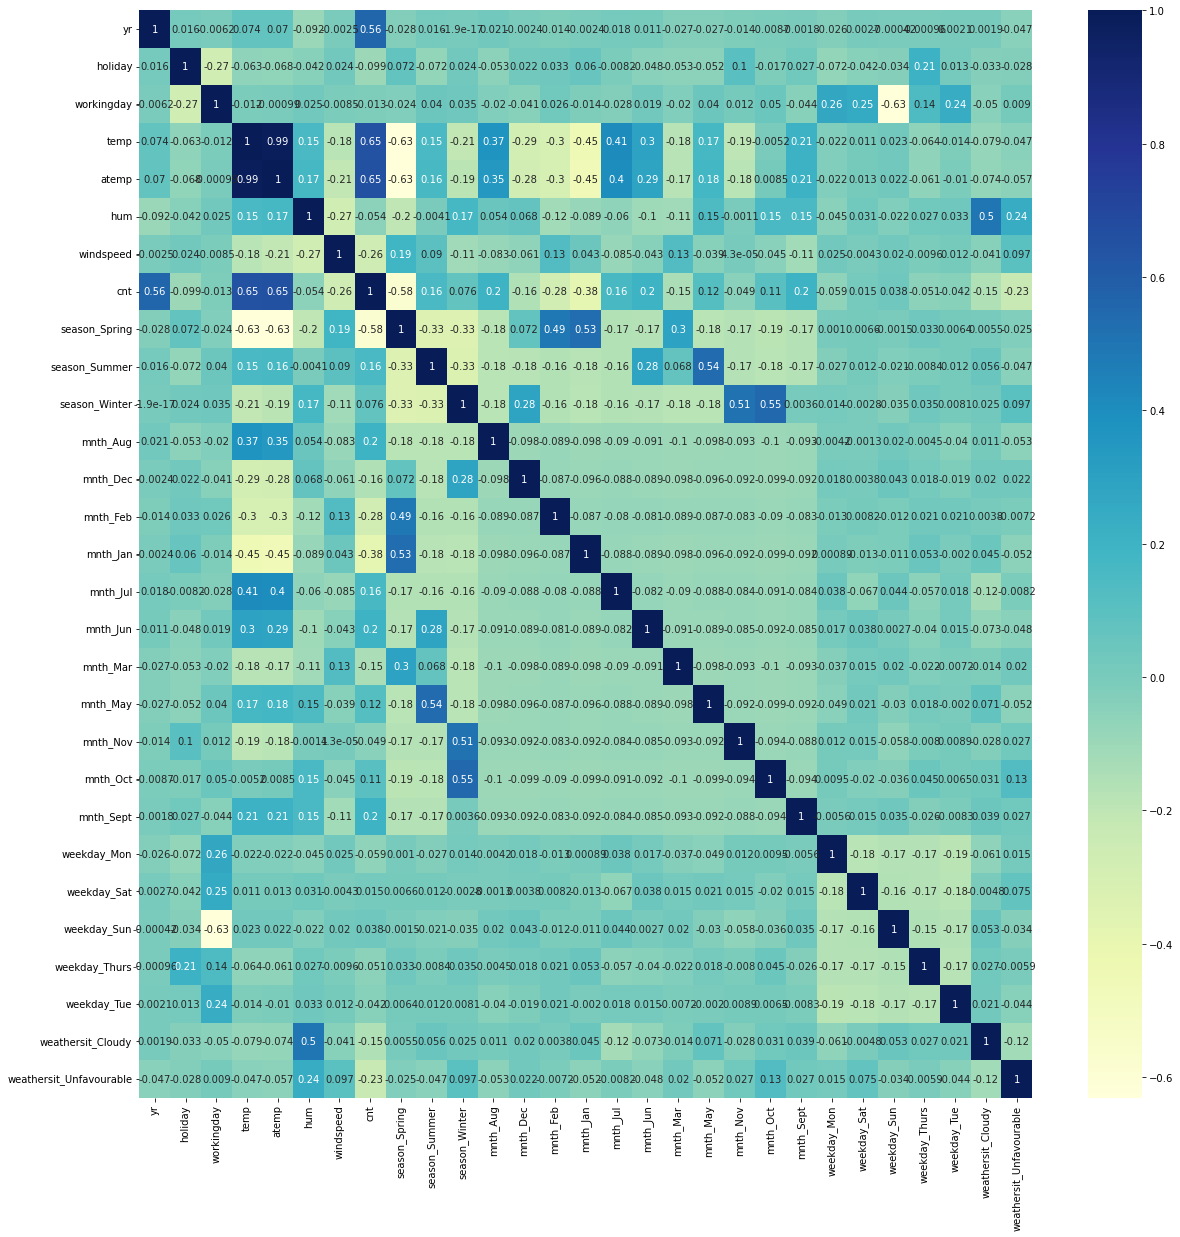

In [33]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [34]:
#dividing X and y in train dataset
y_train = df_train.pop('cnt')
x_train = df_train

In [35]:
y_train.head()

367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
Name: cnt, dtype: float64

In [36]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weathersit_Cloudy,weathersit_Unfavourable
367,1,0,1,0.113228,0.061963,0.454701,0.695175,1,0,0,...,0,0,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0,0,1,...,0,1,0,0,1,0,0,0,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,1,0,0,...,0,0,0,0,0,0,1,0,0,0
705,1,0,0,0.326094,0.318824,0.787463,0.189819,0,0,1,...,0,0,0,0,0,0,0,0,1,0
379,1,0,1,0.133996,0.108365,0.431945,0.449210,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
#building model using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
#running RFE for 15 variables
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(x_train, y_train)

In [39]:
#features selected by the model
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 6),
 ('weekday_Tue', False, 5),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Unfavourable', True, 1)]

In [40]:
# selecting those columns selected by model
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_Cloudy',
       'weathersit_Unfavourable'],
      dtype='object')

In [41]:
# features not selected by model
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [44]:
#running linear regression on features selected by RFE
lm = sm.OLS(y_train,x_train_rfe).fit()

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          9.71e-222
Time:                        12:56:17   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [46]:
#dropping constant before VIF
X=x_train_rfe.drop('const',axis=1)

In [47]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.19
2,temp,18.15
4,windspeed,4.70
5,season_Spring,4.43
7,season_Winter,3.80
6,season_Summer,2.81
13,weathersit_Cloudy,2.34
0,yr,2.11
11,mnth_Nov,1.74
9,mnth_Jan,1.71


In [48]:
# Let's drop the 'hum' column as it has high VIF
x_train_rfe.drop("hum",axis=1,inplace=True)
x_train_rfe

,const,yr,holiday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_Cloudy,weathersit_Unfavourable
367,1.0,1,0,0.113228,0.695175,1,0,0,0,1,0,0,0,0,0
648,1.0,1,0,0.468352,0.299450,0,0,1,0,0,0,0,0,0,0
44,1.0,0,0,0.443431,0.807474,1,0,0,0,0,0,0,0,0,0
705,1.0,1,0,0.326094,0.189819,0,0,1,1,0,0,0,0,1,0
379,1.0,1,0,0.133996,0.449210,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,1,0
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,0,1,0


In [49]:
x_train_rfe = sm.add_constant(x_train_rfe)

# Now that we have removed one variable, let's fit the model with other variables
lm2 = sm.OLS(y_train, x_train_rfe).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.8
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          8.39e-219
Time:                        12:56:20   Log-Likelihood:                 584.55
No. Observations:                 584   AIC:                            -1139.
Df Residuals:                     569   BIC:                            -1074.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [50]:
#creating another set of columns for VIF
Y=x_train_rfe.drop('const',axis=1)

In [51]:
#checking the VIF w/o hum
vif = pd.DataFrame()
vif['Features'] = Y.columns
vif['VIF'] = [variance_inflation_factor(Y.values, i) for i in range(Y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.34
3,windspeed,4.65
4,season_Spring,2.87
6,season_Winter,2.78
5,season_Summer,2.28
0,yr,2.08
10,mnth_Nov,1.69
8,mnth_Jan,1.62
9,mnth_Jul,1.61
12,weathersit_Cloudy,1.56


In [52]:
# however the p-values and VIFs are all okay, we still have high number of features. Due to which 
# we have adj R(2) = 84%
#we will try to reduce it by reducing the number of features from 15 to only 5

In [53]:
#running RFE(2) for 10 variables
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe2 = RFE(lm, 10)             
rfe2 = rfe2.fit(x_train, y_train)

In [54]:
#features selected by the model(2)
list(zip(x_train.columns,rfe2.support_,rfe2.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 17),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 6),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 12),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 15),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 19),
 ('weekday_Sun', False, 16),
 ('weekday_Thurs', False, 11),
 ('weekday_Tue', False, 10),
 ('weathersit_Cloudy', False, 2),
 ('weathersit_Unfavourable', True, 1)]

In [55]:
# selecting those columns selected by model(2)
col2 = x_train.columns[rfe2.support_]
col2

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Jul', 'mnth_Sept', 'weathersit_Unfavourable'],
      dtype='object')

In [56]:
# Creating X_train(2) dataframe with RFE(2) selected variables
x_train_rfe2 = x_train[col2]

# Adding a constant variable  
x_train_rfe2 = sm.add_constant(x_train_rfe2)

#running linear regression on features selected by RFE
lm3 = sm.OLS(y_train,x_train_rfe2).fit()

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     286.2
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          2.06e-215
Time:                        12:56:23   Log-Likelihood:                 565.04
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     573   BIC:                            -1060.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [57]:
#dropping constant(2) before VIF
X2=x_train_rfe2.drop('const',axis=1)

# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.35
2,temp,13.28
4,windspeed,4.11
5,season_Spring,2.50
0,yr,2.06
6,season_Winter,1.95
7,mnth_Jul,1.40
8,mnth_Sept,1.20
9,weathersit_Unfavourable,1.11
1,holiday,1.04


In [58]:
# Let's drop the 'hum' column as it has high VIF
x_train_rfe2.drop("hum",axis=1,inplace=True)
x_train_rfe2

,const,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Jul,mnth_Sept,weathersit_Unfavourable
367,1.0,1,0,0.113228,0.695175,1,0,0,0,0
648,1.0,1,0,0.468352,0.299450,0,1,0,0,0
44,1.0,0,0,0.443431,0.807474,1,0,0,0,0
705,1.0,1,0,0.326094,0.189819,0,1,0,0,0
379,1.0,1,0,0.133996,0.449210,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0
79,1.0,0,0,0.462664,0.529881,0,0,0,0,0


In [59]:
x_train_rfe2 = sm.add_constant(x_train_rfe2)

# Now that we have removed one variable, let's fit the model with other variables
lm4 = sm.OLS(y_train, x_train_rfe2).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     270.5
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          5.76e-200
Time:                        12:56:24   Log-Likelihood:                 525.79
No. Observations:                 584   AIC:                            -1032.
Df Residuals:                     574   BIC:                            -987.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [60]:
#dropping constant(2) before VIF
Y2=x_train_rfe2.drop('const',axis=1)

# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = Y2.columns
vif['VIF'] = [variance_inflation_factor(Y2.values, i) for i in range(Y2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.41
3,windspeed,4.08
0,yr,2.06
4,season_Spring,1.66
5,season_Winter,1.37
6,mnth_Jul,1.34
7,mnth_Sept,1.19
8,weathersit_Unfavourable,1.06
1,holiday,1.04


In [61]:
#the Adjusted R(2) has decreased but so has the R2 value simultaniously. What can be interpreted?

In [62]:
## 5. Residual Analysis

In [63]:
y_train_cnt = lm4.predict(x_train_rfe2)

Text(0.5, 0, 'Errors')

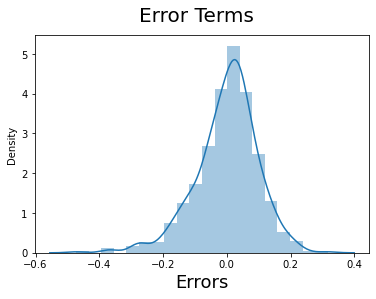

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

In [65]:
#the error terms are normally distributed around 0

In [66]:
## 6. Making predictions

In [67]:
# scale test set before making predictions

In [68]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'atemp', 'cnt']

In [69]:
#scale the test set
df_test[var] = scaler.transform(df_test[var])

In [70]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
x_test = df_test

In [71]:
# Let's check the list 'col2' which had the 9 (excluding hum) variables RFE had selected
test_cols = Y2.columns
test_cols

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter',
       'mnth_Jul', 'mnth_Sept', 'weathersit_Unfavourable'],
      dtype='object')

In [72]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
x_test_rfe2 = x_test[test_cols]

In [73]:
# Add a constant to the test set created
x_test_rfe2 = sm.add_constant(x_test_rfe2)
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    146 non-null    float64
 1   yr                       146 non-null    int64  
 2   holiday                  146 non-null    int64  
 3   temp                     146 non-null    float64
 4   windspeed                146 non-null    float64
 5   season_Spring            146 non-null    uint8  
 6   season_Winter            146 non-null    uint8  
 7   mnth_Jul                 146 non-null    uint8  
 8   mnth_Sept                146 non-null    uint8  
 9   weathersit_Unfavourable  146 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 7.6 KB


In [74]:
# Making predictions
y_pred = lm4.predict(x_test_rfe2)

Text(0, 0.5, 'y_pred')

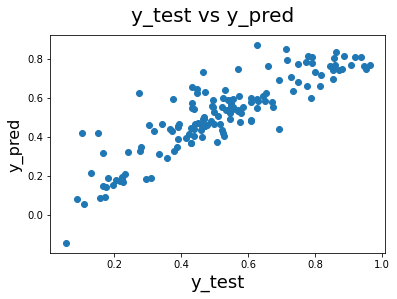

In [75]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [76]:
# r2_score for 9 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7585654641007156

In [77]:
# the R2 value of training and test set are 80 and 75 respectively which are different. This is not significantly different
# and not showing the case of overfitting. however we will try to treat it for overfitting
# also we would like to build the model using crossvalidation technique as well

In [78]:
### Model Evaluation using Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
#gives all the scoring metrics availaible to us
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [81]:
#cross-val score with all var
cross_val_score(lm, x_train, y_train, cv=5, n_jobs=-1).mean()

0.830791851445488

In [82]:
#MAE score with all var
cross_val_score(lm, x_train, y_train, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error').mean()*-1

0.06752338491896466

In [83]:
#cross-val score with 14 var
cross_val_score(lm, x_train_rfe, y_train, cv=5, n_jobs=-1).mean()

0.8285498048652216

In [84]:
#MAE score with 14 var
cross_val_score(lm, x_train_rfe, y_train, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error').mean()*-1

0.06891948325496058

In [85]:
#cross-val score with 9 var
cross_val_score(lm, x_train_rfe2, y_train, cv=5, n_jobs=-1).mean()

0.7952276302439655

In [86]:
#MAE score with 9 var
cross_val_score(lm, x_train_rfe2, y_train, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error').mean()*-1

0.07651522076778967

In [87]:
## cross validation for right number of feature selection

In [88]:
num_features = x_train.shape
num_features[1]

28

In [89]:
cv_scores = []

In [90]:
lm = LinearRegression()

In [91]:
for features in range(1, num_features[1]+1):
    rfe_CV = RFE(lm, n_features_to_select=features)
    scores = cross_val_score(rfe_CV, x_train, y_train, cv=4)
    cv_scores.append(scores.mean())

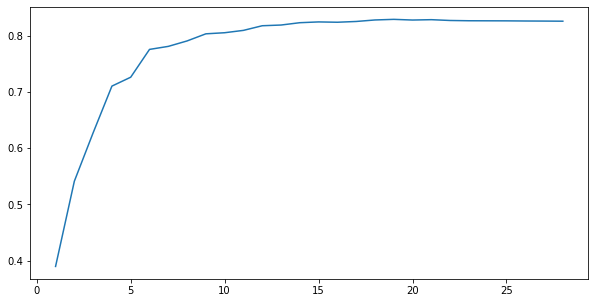

In [92]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), cv_scores)
plt.show()

In [93]:
## using RFE CV, faster than normal CV

In [94]:
from sklearn.feature_selection import RFECV

In [95]:
rfecv = RFECV(estimator=lm, cv=4)

In [96]:
rfecv.fit(x_train, y_train)

RFECV(cv=4, estimator=LinearRegression())

In [97]:
rfecv.grid_scores_

array([0.38961625, 0.5412725 , 0.62740833, 0.710471  , 0.72628898,
       0.77573724, 0.78112353, 0.79080771, 0.80346117, 0.80541134,
       0.80959288, 0.81784056, 0.81909931, 0.82324198, 0.82464093,
       0.8240677 , 0.82543637, 0.82811273, 0.82920445, 0.82799216,
       0.82863162, 0.82719739, 0.82671545, 0.82662468, 0.82653941,
       0.82627519, 0.82613371, 0.8259212 ])

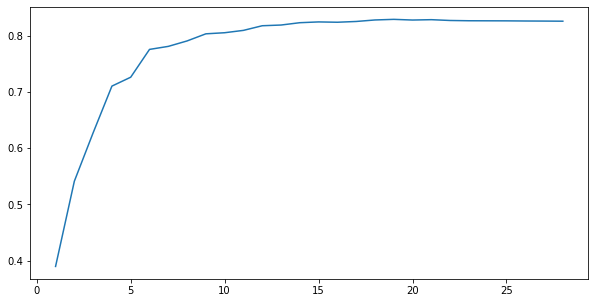

In [98]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [99]:
#model selection of correct number of feature selection
rfecv.n_features_

19

In [ ]:
# its not feasible to take 19 features out of 23 features available. we are getting almost 80% accuracy by only 10 features, and will stick to it

In [100]:
### model building using gradient boosting

MSE: 0.01


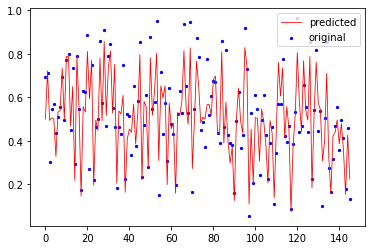

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(x_train_rfe2, y_train)

y_pred_gbr = gbr.predict(x_test_rfe2)
mse = mean_squared_error(y_test,y_pred_gbr)
print("MSE: %.2f" % mse)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_gbr, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()